<a href="https://colab.research.google.com/github/ruantos/python-para-data/blob/main/dados_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando dados

In [56]:
import pandas as pd

In [57]:
URL = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"

In [58]:
data = pd.read_csv(URL, delimiter=";")

## Conhecendo os dados

### Mostra os 5 primeiros registros

In [59]:
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


### Mostra a quantidade de linhas e colunas do df

In [60]:
data.shape

(32960, 9)

### Mostra principais info acerca do df (colunas, tipos, qtd de null, qtd de registros)

In [61]:
data.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


### Checando colunas

In [63]:
data["Tipo"]

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento
...,...
32955,Quitinete
32956,Apartamento
32957,Apartamento
32958,Apartamento


In [64]:
data[["Quartos", "Valor"]]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


## EDA (Exploratory Data Analysis)

### Média de aluguel de cada tipo de imóvel

In [65]:
avg_rent = data.groupby(by="Tipo")["Valor"].mean().sort_values()

In [66]:
avg_rent

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


### Para plotar a Series

<Axes: ylabel='Tipo'>

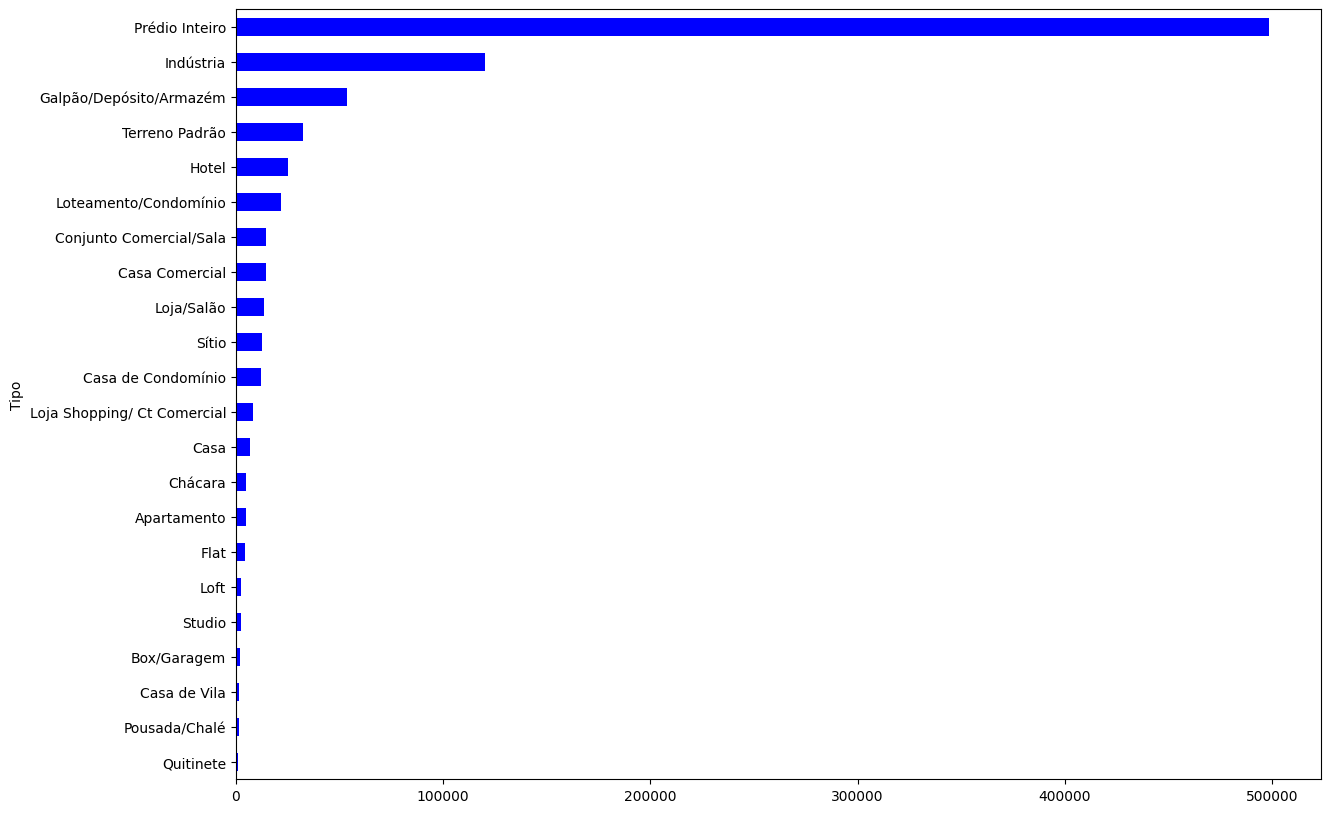

In [67]:
avg_rent.plot(kind="barh", figsize=(14, 10), color="blue")

## Removendo imóveis comerciais

In [68]:
residentials = ['Quitinete', 'Casa', 'Apartamento','Casa de Condomínio','Flat',
                'Casa de Vila','Loft']

data_res = data[data["Tipo"].isin(residentials)]

In [69]:
data_res["Tipo"].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft'], dtype=object)

<Axes: ylabel='Tipo'>

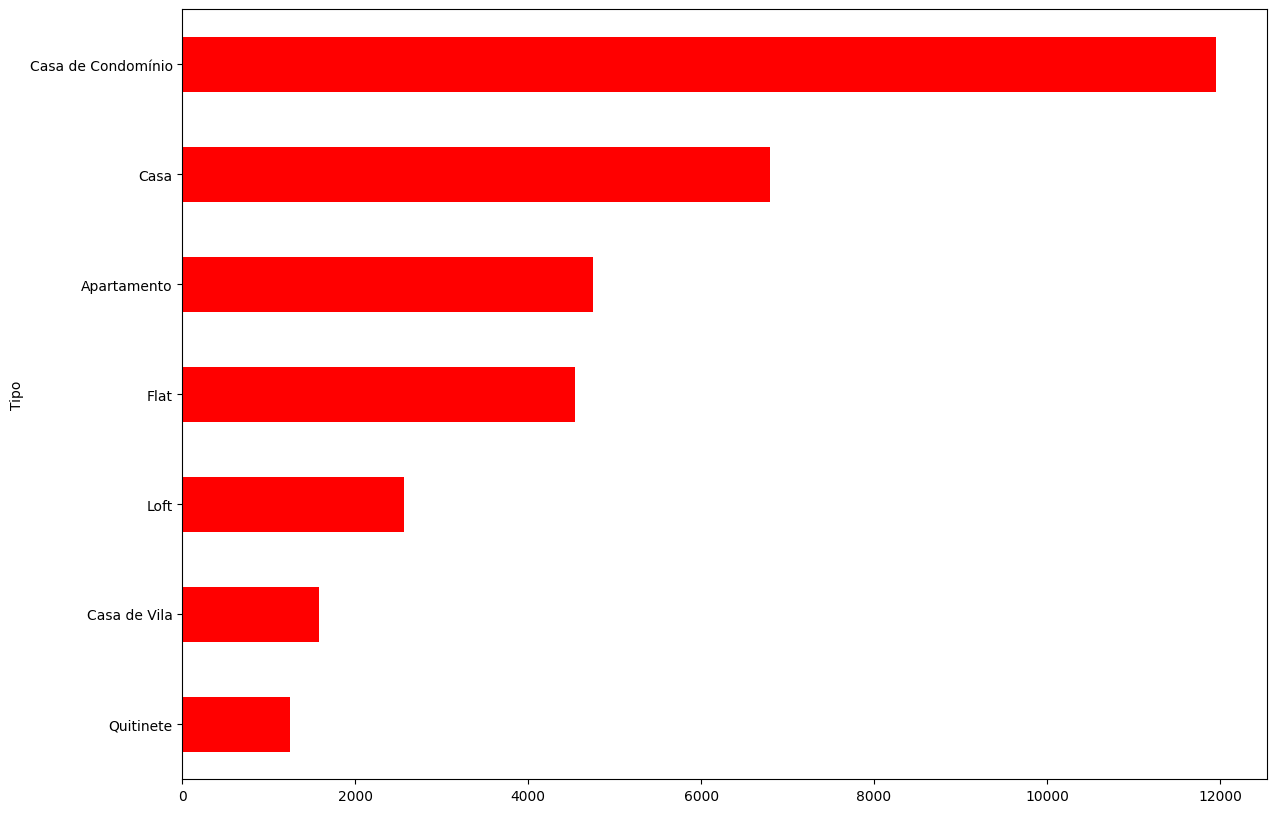

In [70]:
avg_rent = data_res.groupby(by="Tipo")["Valor"].mean().sort_values()
avg_rent.plot(kind="barh", figsize=(14, 10), color="red")

### Percentual de cada tipo de imóvel presente na base de dados

In [71]:
percent = data_res["Tipo"].value_counts(normalize=True).to_frame().sort_values("proportion")
percent.index

Index(['Loft', 'Casa de Vila', 'Flat', 'Quitinete', 'Casa',
       'Casa de Condomínio', 'Apartamento'],
      dtype='object', name='Tipo')

<Axes: xlabel='Tipo'>

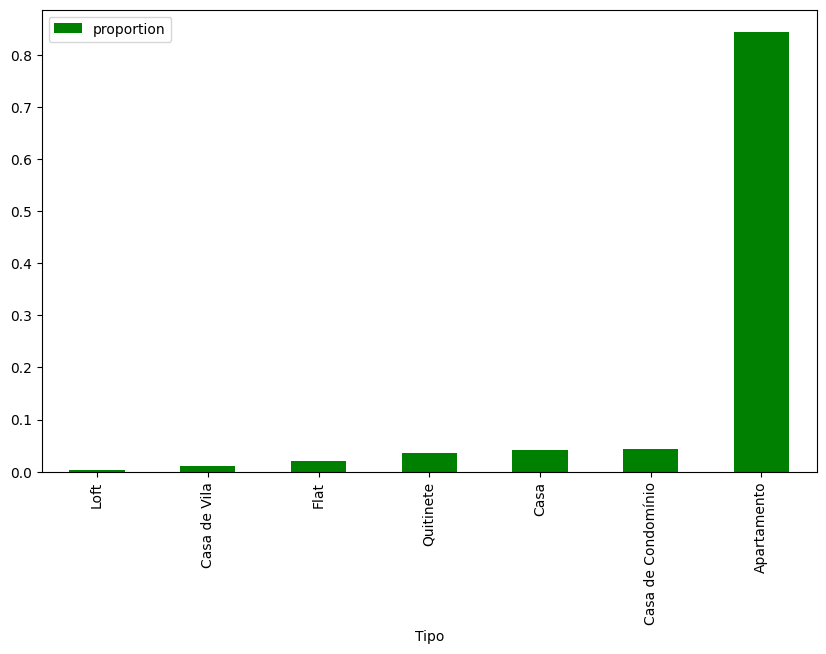

In [72]:
percent.plot(kind="bar", figsize=(10, 6), color="green")

### Utilizando apenas imóveis apartamento

In [73]:
data_apt = data_res.query("Tipo == 'Apartamento' ")

In [74]:
data_apt.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


## 1) Calcular a média de quartos por apartamento;

In [75]:
data_apt["Quartos"].mean()

np.float64(2.481568707761622)

## 2) Conferir quantos bairros únicos existem na nossa base de dados;



In [76]:
data_apt["Bairro"].nunique()

149

## 3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

In [77]:
expensive = data_apt.groupby(by="Bairro")["Valor"].mean().sort_values(ascending=False)

## 4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.



<Axes: ylabel='Bairro'>

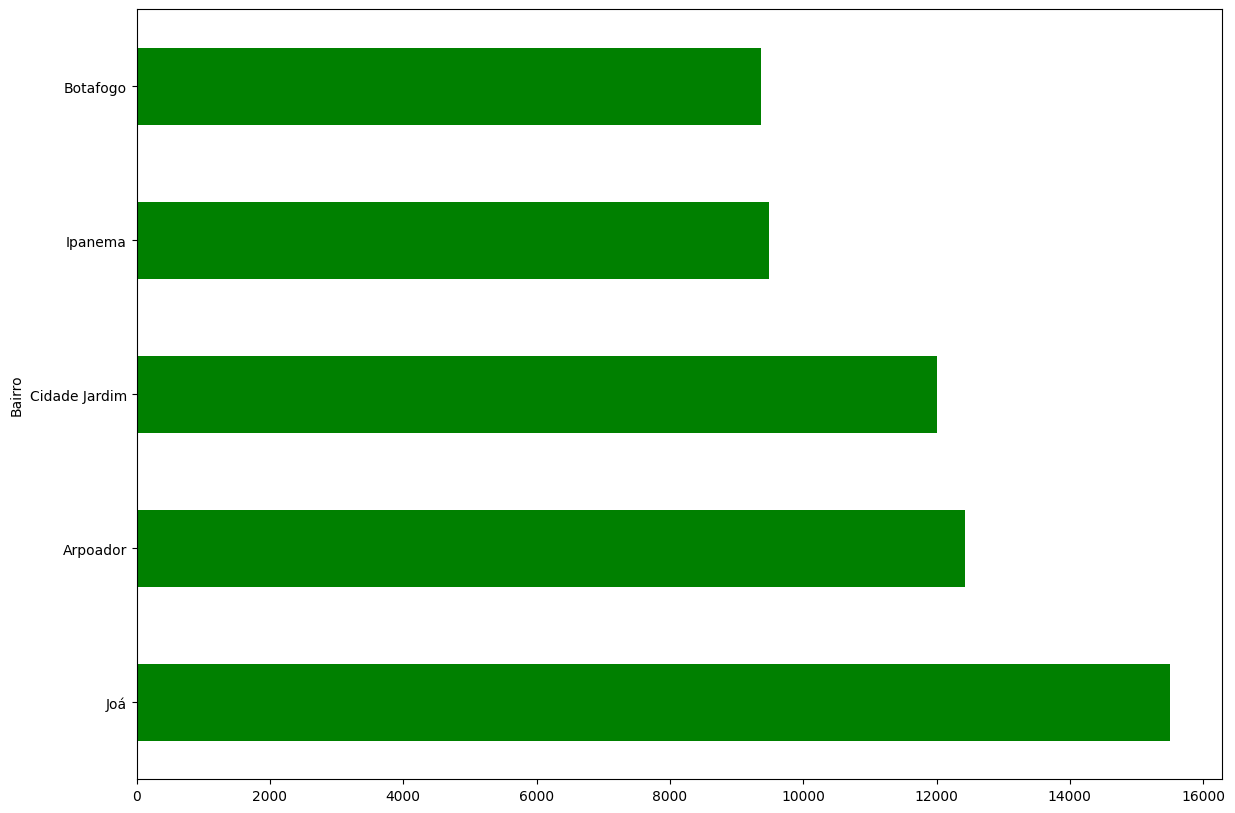

In [78]:
expensive.head().plot(kind="barh", figsize=(14, 10), color="green")

## Tratando e filtrando dados

### Dropa coluna inútil

In [79]:
data_apt = data_apt.drop(columns=["Tipo"])
data_apt.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Centro,1,0,0,36,1200.0,NaN,NaN


### Lidando com dados nulos

In [83]:
data_apt.isnull().sum()

,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,7
Condominio,745
IPTU,5472


In [85]:
data_apt = data_apt.fillna(0)
data_apt.isnull().sum()

,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,0
Condominio,0
IPTU,0
